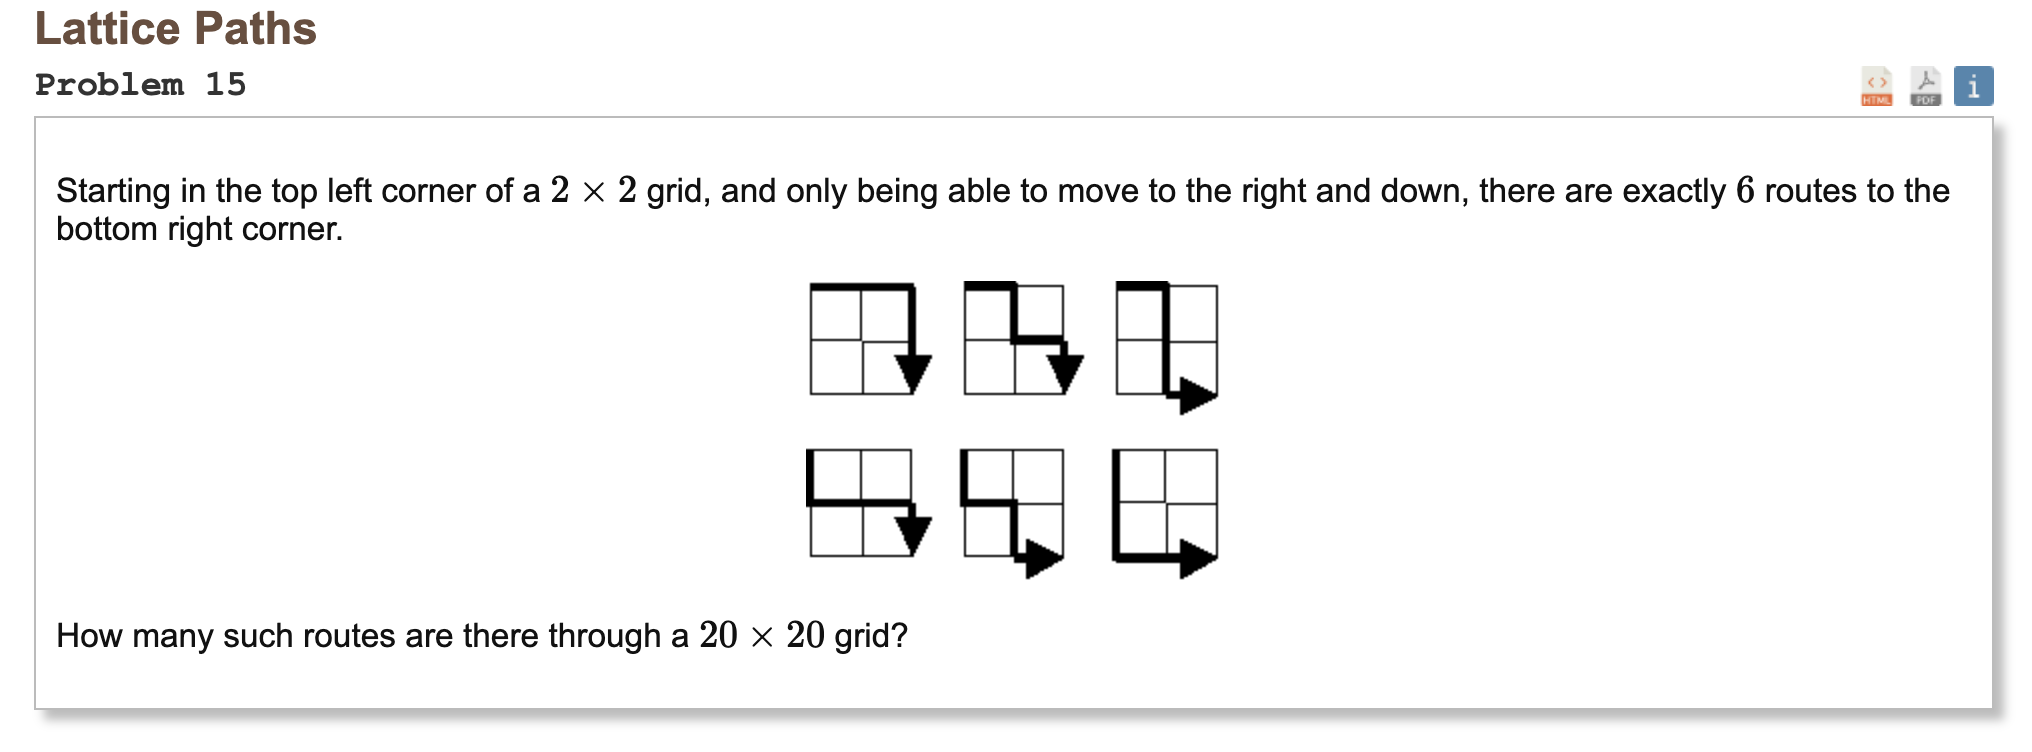

## Initial approach

* Can I use recursion?
* Can I memorize repeated results to save time?
* Is there a mathematical pattern (like combinations)?

* (0,0) is starting point, (m x n) is end point
* in each step x or y can increase by 1
* they can ONLY increase
* it stops when x and y both reaches m and n

In [1]:
import random

In [2]:
def grid(m, n):
    list_of_moves = []
    counter = 0
    
    while counter < 100000:
        x, y = 0, 0
        sub_moves = [(x, y)]  # include starting point
        while x < m and y < n:
            if random.choice(["x", "y"]) == "x":
                x += 1
            else:
                y += 1
            sub_moves.append((x, y))
        
        if sub_moves not in list_of_moves:
            list_of_moves.append(sub_moves.copy())
        
        counter += 1
    
    return len(list_of_moves)

In [3]:
%%time

grid(20,20)

CPU times: user 1min 32s, sys: 520 ms, total: 1min 32s
Wall time: 1min 32s


99997

* Uses `random.choice`, so it only samples random paths — not all possible paths.
* No guarantee it will find all unique paths, even with many iterations.
* `while counter < 100000` is inefficient and incomplete.
* Problem is mathematical (combinatorics), not suitable for random simulation.
* Correct solution uses binomial coefficient: (2n choose n) → `(2n)! / (n! * n!)`
* Random simulation can't scale or give exact results — just approximations.
* Better alternative: use `math.comb(2n, n)` for instant, exact answer.
* Way too slow!

## Clean and tested code

In [5]:
%%time

import math

def count_paths(m, n):
    return math.comb(m + n, m)

# Efficient and instant
print(count_paths(20, 20))  # Output: 137846528820

137846528820
CPU times: user 318 μs, sys: 111 μs, total: 429 μs
Wall time: 406 μs
